In [554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,scale,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm  

In [501]:
cars = pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Car_pricing_prediction/CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [502]:
cars.shape

(205, 26)

In [503]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [504]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [505]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [506]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [507]:
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

In [508]:
cars.CarName.value_counts()

toyota corona                6
toyota corolla               6
peugeot 504                  6
subaru dl                    4
mitsubishi outlander         3
                            ..
honda civic 1300             1
nissan juke                  1
peugeot 505s turbo diesel    1
nissan fuga                  1
volkswagen type 3            1
Name: CarName, Length: 147, dtype: int64

In [509]:
cars_num = cars.select_dtypes(include=['float64', 'int'])
cars_num.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [510]:
cars_num = cars_num.drop(['car_ID'],axis=1)

In [511]:
cars_num.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


# DATA VISUALISATION

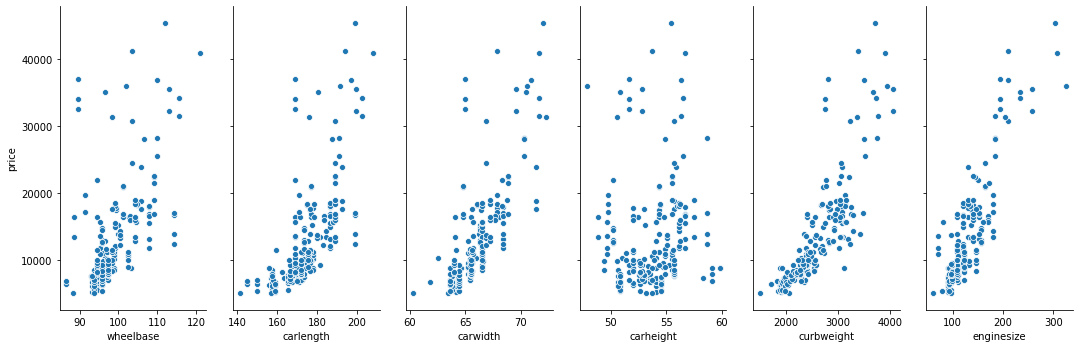

In [512]:
sns.pairplot(cars, x_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize'], y_vars='price', size=5, aspect=0.5,kind='scatter')

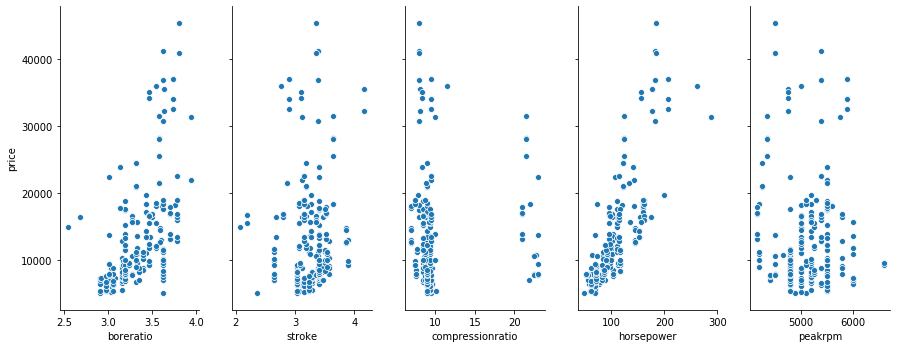

In [513]:
sns.pairplot(cars,x_vars=['boreratio','stroke','compressionratio','horsepower',
'peakrpm'],y_vars='price',size=5,aspect=0.5,kind='scatter')

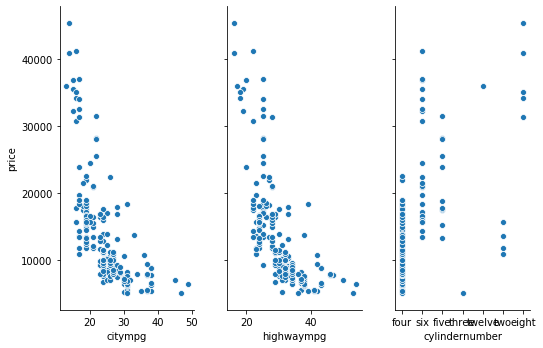

In [514]:
sns.pairplot(cars,x_vars=['citympg',             
'highwaympg','cylindernumber'],y_vars='price',size=5,aspect=0.5,kind='scatter')

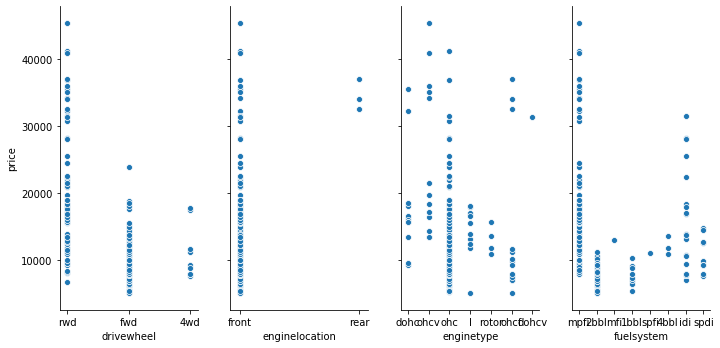

In [517]:
sns.pairplot(cars, x_vars=['drivewheel','enginelocation','enginetype','fuelsystem'], y_vars='price', size=5, aspect=0.5,kind='scatter')

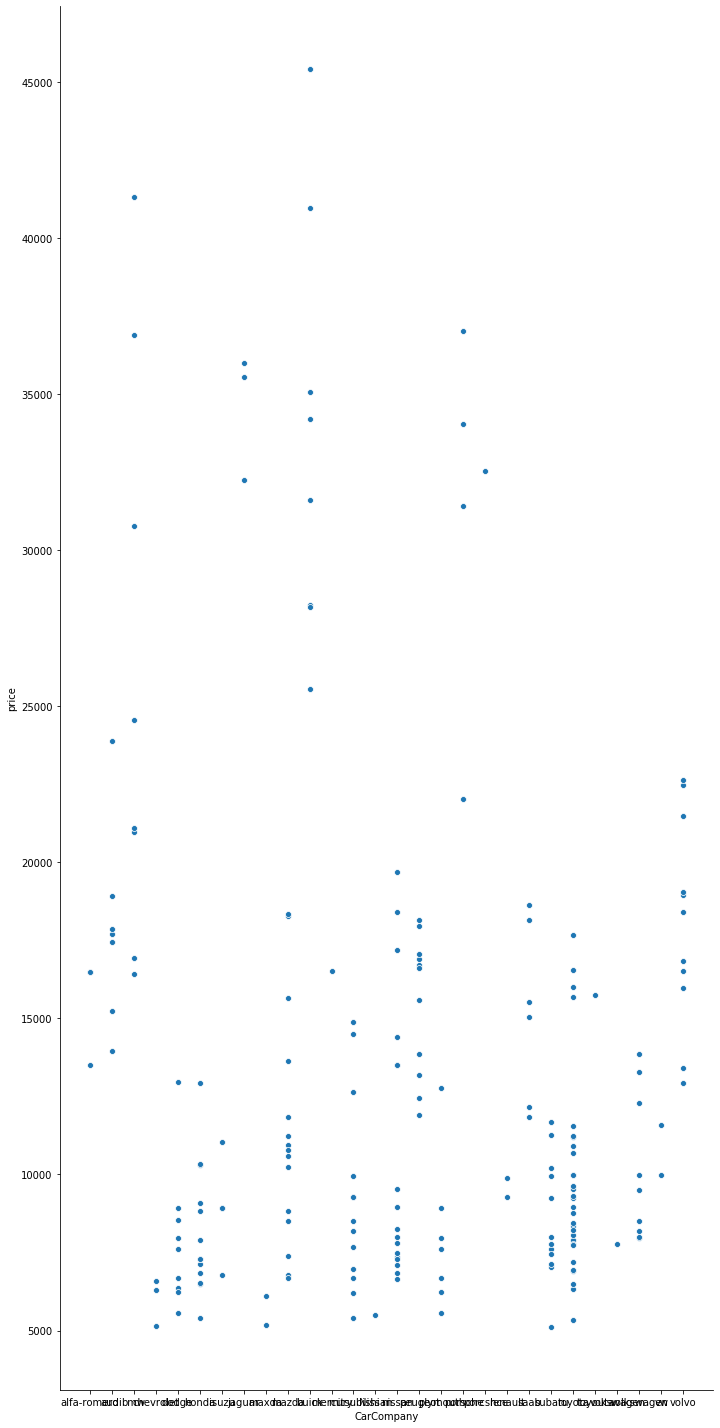

In [520]:
car_df = cars.join(cars['CarName'].str.split(' ', 1, expand=True).rename(columns={0:'CarCompany', 1:'CarModel'}))
car_df = car_df.drop('CarName',axis=1)
sns.pairplot(car_df, x_vars=['CarCompany'], y_vars='price',size=20
             ,aspect=0.5,kind='scatter')

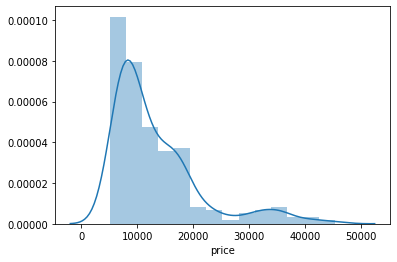

In [521]:
sns.distplot(cars['price'])

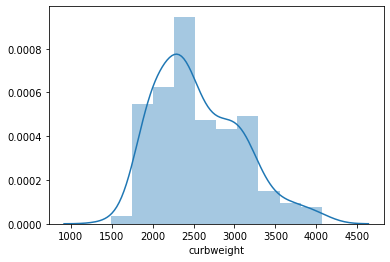

In [522]:
sns.distplot(cars['curbweight'])

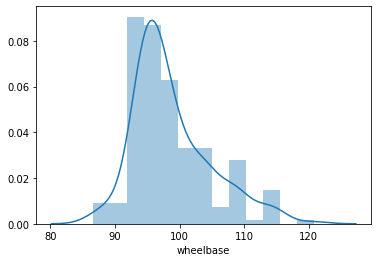

In [523]:
sns.distplot(cars['wheelbase'])

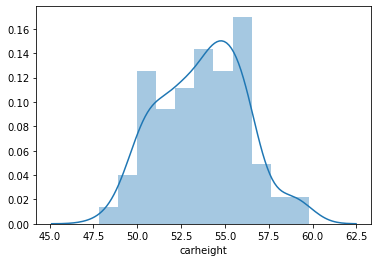

In [524]:
sns.distplot(cars['carheight'])

(0, 20)

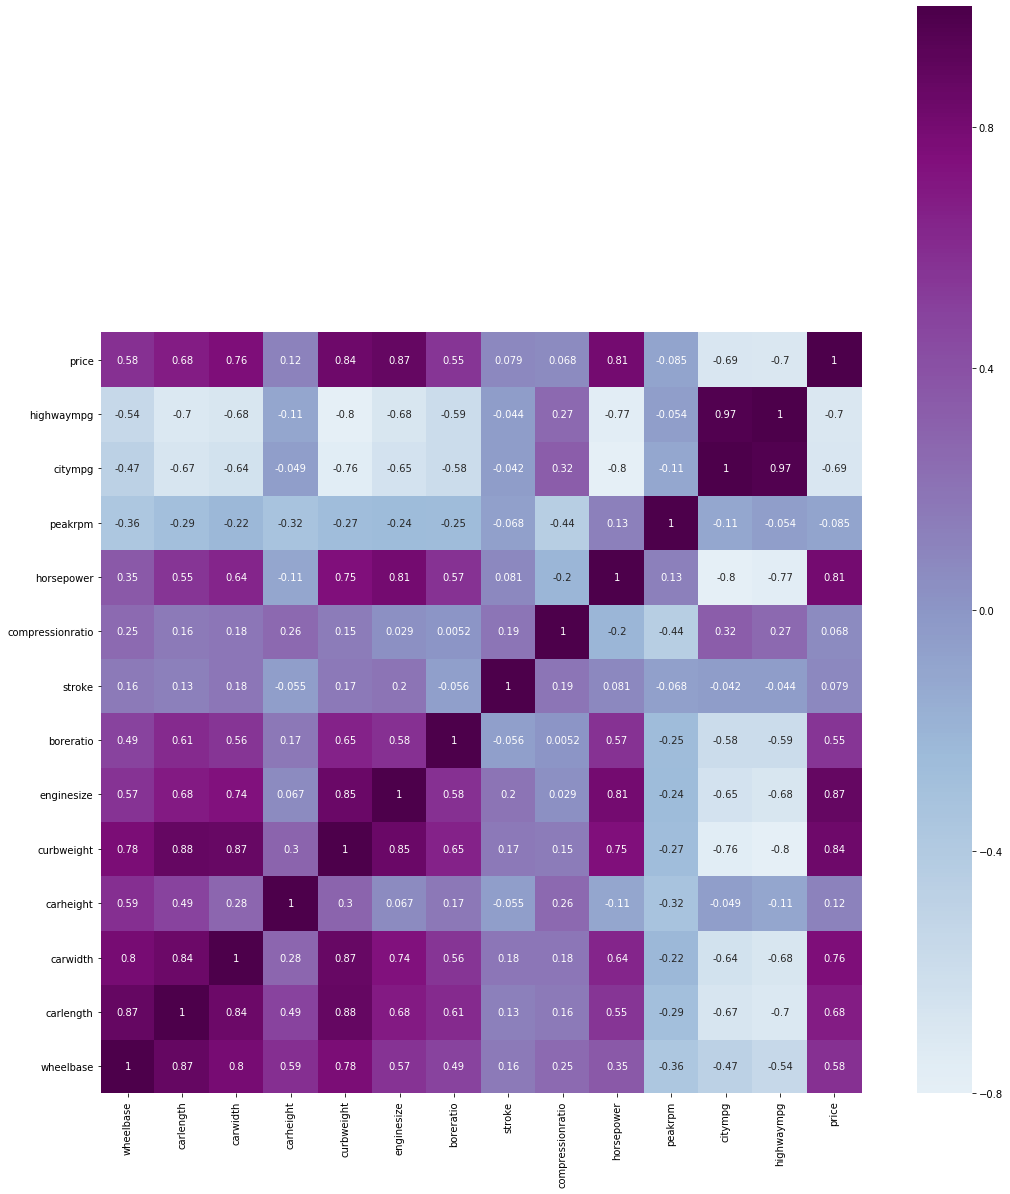

In [525]:
cor = cars_num.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(cor, square = True, center = 0, annot = True, cmap="BuPu")
ax.set_ylim(0,20)

The correlation matrix relates well with the scatter plots above for data fields such as 'carwidth', 'curbweight', 'carheigth' (we observe a trend in the plots)

In [526]:
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


# DATA CLEANING

Below we are looking at the unique values in the data field (It can used to check spel errors and some irregular data inputs)

In [322]:
for i in car_df.select_dtypes(include=['object']):
    print(i)
    print(car_df[i].value_counts())
    print()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64

doornumber
four    115
two      90
Name: doornumber, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

CarCompa

Above there are few spelling mistakes in the data record. We rectify these recoeds and store them in a new column while droopping the previous one.

In [527]:
car_df['Car_Company'] = car_df['CarCompany']
car_df.loc[(car_df['Car_Company'] == "vw") | (car_df['Car_Company'] == "vokswagen"), 'Car_Company'] = 'volkswagen'
car_df.loc[car_df['Car_Company'] == "porcshce", 'Car_Company'] = 'porsche'
car_df.loc[car_df['Car_Company'] == "toyouta", 'Car_Company'] = 'toyota'
car_df.loc[car_df['Car_Company'] == "Nissan", 'Car_Company'] = 'nissan'
car_df.loc[car_df['Car_Company'] == "maxda", 'Car_Company'] = 'mazda'
print(car_df.Car_Company.value_counts())
car_df = car_df.drop('CarCompany',axis=1)

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Car_Company, dtype: int64


# DATA MANIPULATION

In [528]:
y = cars.price
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [529]:
# Seperating Categorical variables
car_cat = car_df.select_dtypes(include=['object'])
car_cat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarModel,Car_Company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,giulia,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,stelvio,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Quadrifoglio,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,100 ls,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,100ls,audi


In [530]:
car_cat.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarModel,Car_Company
count,205,205,205,205,205,205,205,205,205,205,203,205
unique,6,2,2,2,5,3,2,7,7,8,141,22
top,0,gas,std,four,sedan,fwd,front,ohc,four,mpfi,corolla,toyota
freq,67,185,168,115,96,120,202,148,159,94,6,32


In [531]:
car_cat = car_cat.drop('CarModel',axis=1)

In [532]:
# Encoding Categorical Variables
cars_dummies = pd.get_dummies(car_cat, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,Car_Company_nissan,Car_Company_peugeot,Car_Company_plymouth,Car_Company_porsche,Car_Company_renault,Car_Company_saab,Car_Company_subaru,Car_Company_toyota,Car_Company_volkswagen,Car_Company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [533]:
cars_num = cars_num.drop('price',axis=1)
cols = cars_num.columns
cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [ ]:
# Preprocessing the Numerical Data

In [534]:
sc = StandardScaler()
mn = MinMaxScaler()
cars_num = mn.fit_transform(cars_num)
cars_num = pd.DataFrame(cars_num)

In [535]:
cars_num.columns = cols
cars_num.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [536]:
X = pd.concat([cars_num,cars_dummies],axis=1)
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Car_Company_audi',
       'Car_Company_bmw', 'Car_Company_buick', 'Car_Company_chevrolet',


In [537]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Car_Company_nissan,Car_Company_peugeot,Car_Company_plymouth,Car_Company_porsche,Car_Company_renault,Car_Company_saab,Car_Company_subaru,Car_Company_toyota,Car_Company_volkswagen,Car_Company_volvo
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0,0,0,0,0,0,0,0,0,0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0,0,0,0,0,0,0,0,0,0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,...,0,0,0,0,0,0,0,0,0,0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,...,0,0,0,0,0,0,0,0,0,0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,...,0,0,0,0,0,0,0,0,0,0


# MODEL SELECTION

Initially we run regression on using all the independent variables to find the where we lie if we don't reduce the number of features.

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=100)

In [539]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [540]:
print(model.coef_)
print(model.intercept_)

[ 7.35467379e+03 -5.71374600e+03  9.46751216e+03 -6.19821474e+03
  1.20126182e+04  7.41671760e+04 -2.51331981e+04 -7.61402883e+03
 -1.03757647e+04 -5.92367487e+03  6.98623267e+03 -1.44425790e+03
  4.11683275e+03  2.37898686e+03  1.70939844e+03  1.59451424e+03
  1.78469417e+03  1.03662723e+03 -4.06725230e+03  2.63261136e+03
 -4.70282056e+02 -3.97246807e+03 -3.87264411e+03 -3.32995865e+03
 -2.78876583e+03 -1.88557268e+02  9.16803170e+02  6.99541955e+03
  7.90207869e+03  8.01991671e+03  3.48044990e+02  6.09921124e+03
 -1.18825955e+03  1.47158215e+04  9.76899715e+03  1.62784140e+04
  4.33190801e+03  1.79193961e+04 -1.50641478e+04  1.47158215e+04
  9.65008368e+02 -1.36821185e+03  4.06725230e+03 -1.45519152e-11
 -4.19297986e+02 -2.84986353e+02 -2.27373675e-11  2.87202437e+03
  1.23676928e+04  1.94571482e+03 -1.52666052e+03 -3.40888754e+03
 -2.13267984e+03  4.36187917e+02 -4.09892163e+03  1.12706878e+03
  5.45696821e-12 -4.34803256e+03  1.27608209e+03 -9.89947935e+03
 -3.76753230e+03  9.36051

In [541]:
y_pred = model.predict(X_test)

# metrics
print(r2_score(y_true=y_test, y_pred=y_pred))


0.8382621393399062


We know that we need to keep the quality features instead of quantity while building a model.

Using RFE to reduce the features. We start with a random number of features then either move up or down to see the effect of number of features (ideally we would want minimum number of features)

In [542]:
# RFE with 12 features
from sklearn.feature_selection import RFE

# RFE with 12 features
model1 = LinearRegression()
rfe_12 = RFE(model1, 12)

# fit with 12 features
rfe_12.fit(X_train, y_train)

# Printing the boolean results
print(rfe_12.support_)           
print(rfe_12.ranking_)

[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True False False
 False  True  True  True False False False False False False False False
  True False False False False False False False False False False False
 False  True False False False False False False]
[ 7 17  1 13  1  1  1  1 22 11  9 32 23 34 44 46 45 47 21  8 49 28 27 29
 30 54 36  1 10  5 51 19 43  1  3  2 25  1  1  1 31 35 26 55 52 53 56 33
  1 41 20 15 18 42 24 37 57  6 39  4 14  1 50 12 48 40 38 16]


In [543]:
# making predictions using rfe model
y_pred = rfe_12.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.9095480291071434


In [544]:
model2 = LinearRegression()
rfe_5 = RFE(model2, 5)

# fit with 12 features
rfe_5.fit(X_train, y_train)

# Printing the boolean results
print(rfe_5.support_)           
print(rfe_5.ranking_)

y_pred = rfe_5.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

[False False  True False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False]
[14 24  1 20  1  1  5  7 29 18 16 39 30 41 51 53 52 54 28 15 56 35 34 36
 37 61 43  1 17 12 58 26 50  8 10  9 32  2  6  3 38 42 33 62 59 60 63 40
  1 48 27 22 25 49 31 44 64 13 46 11 21  4 57 19 55 47 45 23]
0.8881030657537314


For the above two cases we build linear model to predict the car price. The results are shown in the summary of the respective models.

In [545]:
# subset the features selected by rfe_12
col_12 = X_train.columns[rfe_12.support_]

# subsetting training data for 12 selected columns
X_train_rfe_12= X_train[col_12]

# add a constant to the model
X_train_rfe_12 = sm.add_constant(X_train_rfe_12)
X_train_rfe_12.head()

/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Car_Company_bmw,Car_Company_porsche
122,1.0,0.291667,0.272692,0.139623,0.307143,0.552381,0,0,0,0,0,0,0
125,1.0,0.666667,0.500388,0.339623,1.000000,0.495238,0,0,0,0,0,0,1
166,1.0,0.308333,0.314973,0.139623,0.500000,0.480952,0,0,0,0,0,0,0
1,1.0,0.316667,0.411171,0.260377,0.664286,0.290476,0,0,0,0,0,0,0
199,1.0,0.575000,0.647401,0.260377,0.771429,0.514286,0,0,0,0,0,0,0


In [546]:
lm_12 = sm.OLS(y_train, X_train_rfe_12).fit()   
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           6.86e-65
Time:                        01:46:23   Log-Likelihood:                -1306.8
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     131   BIC:                             2673.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2180.92

In [547]:
col_5 = X_train.columns[rfe_5.support_]
X_train_rfe_5= X_train[col_5]
X_train_rfe_5 = sm.add_constant(X_train_rfe_5)
print(X_train_rfe_5.head())
lm_5 = sm.OLS(y_train, X_train_rfe_5).fit()   
print(lm_5.summary())

     const  carwidth  curbweight  enginesize  enginelocation_rear  \
122    1.0  0.291667    0.272692    0.139623                    0   
125    1.0  0.666667    0.500388    0.339623                    0   
166    1.0  0.308333    0.314973    0.139623                    0   
1      1.0  0.316667    0.411171    0.260377                    0   
199    1.0  0.575000    0.647401    0.260377                    0   

     Car_Company_bmw  
122                0  
125                0  
166                0  
1                  0  
199                0  
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     214.0
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           6.87e-63
Time:                        01:46:23   Log-Likeliho

We see that the jump in the value of r-squared is not very high.
But still we would like to see the variation of r-squared from 4 features to 24 features.

In [548]:
n_features_list = list(range(4, 25))
r2 = []
test_r2 = []

for n_features in range(4, 25):
    lm = LinearRegression()
    rfe_n = RFE(lm, n_features)
    rfe_n.fit(X_train, y_train)
    col_n = X_train.columns[rfe_n.support_]
    X_train_rfe_n = X_train[col_n]
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    r2.append(lm_n.rsquared)
    X_test_rfe_n = X_test[col_n]
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))


/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **

We plot the variation of r2_train and r2_test with number of features selected.

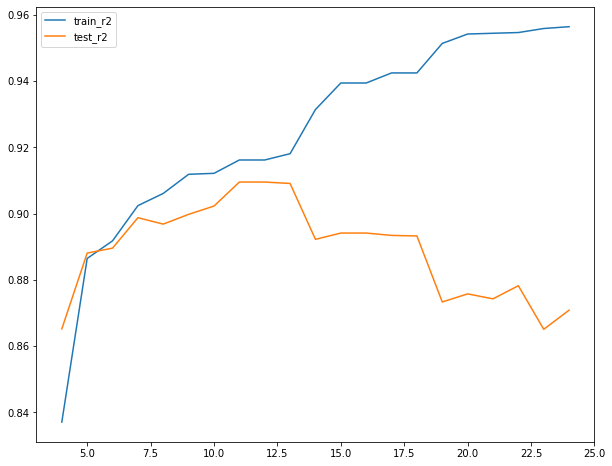

In [549]:
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

r2 doesnt really increase from 6 to 12 after which the value decreases indicating overfitting.
We don't consider 4 or 5 features as it may lead to underfitting. Hence best suitable choise would be between 6 and 12.
We will build the model using 7 features.

# FINAL MODEL

In [550]:
Model = LinearRegression()
rfe_7 = RFE(Model,7)
rfe_7.fit(X_train,y_train)
X_train_rfe_7 = X_train[X_train.columns[rfe_7.support_]]
X_train_rfe_7 = sm.add_constant(X_train_rfe_7)
Model_final = sm.OLS(y_train,X_train_rfe_7).fit()
print('Train R-squared: ',Model_final.rsquared)
X_test = sm.add_constant(X_test[X_train.columns[rfe_7.support_]])
y_pred = Model_final.predict(X_test)
print('Test R-squared: ',r2_score(y_test,y_pred))

Train R-squared:  0.902421062858279
Test R-squared:  0.8987773521560527


/home/fegadepoojan/Virtual_environment/CBPA/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [551]:
Model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     178.4
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           5.64e-65
Time:                        01:46:29   Log-Likelihood:                -1317.7
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     135   BIC:                             2675.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1872.5321    598.553     -3.128      0.002   -3056.286    -688.778
carwidth              1.336e+04   2416.207      5.530      0.000    8583.500    1.81e+04
curbweight            7599.4427   2733.109      2.781      0.006    2194.195     1.3e+04
enginesize            2.063e+04   3055.575      6.750      0.000    1.46e+04    2.67e+04
enginelocation_rear   1.658e+04   2619.421      6.329      0.000    1.14e+04    2.18e+04
cylindernumber_three  7023.5321   2571.783      2.731      0.007    1937.336    1.21e+04
cylindernumber_two    5262.9474   1372.528      3.834      0.000    2548.510    7977.385
Car_Company_bmw       8820.2389   1089.708      8.094      0.000    6665.132     1.1e+04
==============================================================================
Omnibus:                        3.903   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.637
Skew:                           0.251   Prob(JB):                        0.162
Kurtosis:                       3.599   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The percentage error in the prediction is shown below.

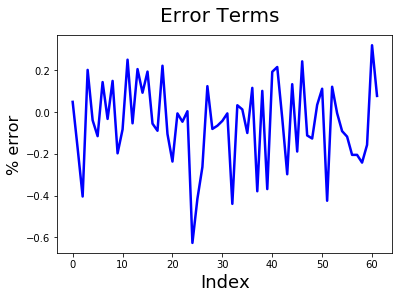

In [552]:
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,(y_test-y_pred)/y_test, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) 
plt.xlabel('Index', fontsize=18)
plt.ylabel('% error', fontsize=16)
plt.show()